<a href="https://colab.research.google.com/github/LauraMattz/comparador-tabelas/blob/main/comparador_tabelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Comparador Profissional de Tabelas

## 📊 Identificando Diferenças Entre Datasets

Este notebook demonstra como comparar duas tabelas e identificar:
- ✅ **Registros Novos** (INSERT)
- 🔄 **Registros Alterados** (UPDATE)
- ❌ **Registros Removidos** (DELETE)
- 📈 **Análise Detalhada das Mudanças**

In [4]:
!pip install colorama

# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


## 📥 1. Carregamento dos Dados

In [5]:
# Carregando as tabelas
df_original = pd.read_csv('dados_originais.csv')
df_atualizado = pd.read_csv('dados_atualizados.csv')

print("📊 TABELA ORIGINAL")
print(f"   Registros: {len(df_original)}")
print(f"   Colunas: {list(df_original.columns)}\n")

print("📊 TABELA ATUALIZADA")
print(f"   Registros: {len(df_atualizado)}")
print(f"   Colunas: {list(df_atualizado.columns)}\n")

print("\n🔍 Primeiras linhas da tabela ORIGINAL:")
display(df_original.head())

print("\n🔍 Primeiras linhas da tabela ATUALIZADA:")
display(df_atualizado.head())

📊 TABELA ORIGINAL
   Registros: 15
   Colunas: ['id', 'nome', 'email', 'cargo', 'empresa', 'salario', 'data_admissao', 'status']

📊 TABELA ATUALIZADA
   Registros: 17
   Colunas: ['id', 'nome', 'email', 'cargo', 'empresa', 'salario', 'data_admissao', 'status']


🔍 Primeiras linhas da tabela ORIGINAL:


,id,nome,email,cargo,empresa,salario,data_admissao,status
0,1,Ana Silva,ana.silva@email.com,Analista de Dados,TechCorp,8500.0,2021-03-15,ativo
1,2,Bruno Costa,bruno.costa@email.com,Engenheiro de Software,DataLabs,12000.0,2020-07-22,ativo
2,3,Carla Mendes,carla.mendes@email.com,Gerente de Projetos,InnovaTech,15000.0,2019-11-10,ativo
3,4,Daniel Oliveira,daniel.oliveira@email.com,Cientista de Dados,AI Solutions,14000.0,2021-01-05,ativo
4,5,Elena Santos,elena.santos@email.com,Desenvolvedora Backend,CloudSystems,10000.0,2022-05-18,ativo



🔍 Primeiras linhas da tabela ATUALIZADA:


,id,nome,email,cargo,empresa,salario,data_admissao,status
0,1,Ana Silva,ana.silva@email.com,Analista Sênior de Dados,TechCorp,9500.0,2021-03-15,ativo
1,2,Bruno Costa,bruno.costa@email.com,Engenheiro de Software,DataLabs,12000.0,2020-07-22,ativo
2,3,Carla Mendes,carla.mendes@email.com,Gerente de Projetos,InnovaTech,15000.0,2019-11-10,inativo
3,4,Daniel Oliveira,daniel.oliveira@email.com,Cientista de Dados Sênior,AI Solutions,16500.0,2021-01-05,ativo
4,5,Elena Santos,elena.santos@email.com,Desenvolvedora Backend,CloudSystems,10000.0,2022-05-18,ativo


## 🔄 2. Identificação de Mudanças

In [6]:
# Definindo a chave primária
chave_primaria = 'id'

# Identificando registros NOVOS (presentes apenas na tabela atualizada)
ids_originais = set(df_original[chave_primaria])
ids_atualizados = set(df_atualizado[chave_primaria])

ids_novos = ids_atualizados - ids_originais
ids_removidos = ids_originais - ids_atualizados
ids_comuns = ids_originais & ids_atualizados

df_novos = df_atualizado[df_atualizado[chave_primaria].isin(ids_novos)].copy()
df_removidos = df_original[df_original[chave_primaria].isin(ids_removidos)].copy()

print("="*80)
print("📊 RESUMO GERAL DA COMPARAÇÃO")
print("="*80)
print(f"🟢 Registros NOVOS (INSERT):    {len(ids_novos):>5}")
print(f"❌ Registros REMOVIDOS (DELETE): {len(ids_removidos):>5}")
print(f"🔄 Registros COMUNS:             {len(ids_comuns):>5}")
print("="*80)

📊 RESUMO GERAL DA COMPARAÇÃO
🟢 Registros NOVOS (INSERT):        2
❌ Registros REMOVIDOS (DELETE):     0
🔄 Registros COMUNS:                15


## 🆕 3. Análise de Registros NOVOS

In [7]:
if len(df_novos) > 0:
    print("\n🟢 NOVOS REGISTROS ENCONTRADOS:")
    print("="*80)
    display(df_novos)

    print("\n📋 Detalhamento dos novos registros:")
    for idx, row in df_novos.iterrows():
        print(f"\n   ID: {row['id']} | {row['nome']}")
        print(f"   ├─ Cargo: {row['cargo']}")
        print(f"   ├─ Empresa: {row['empresa']}")
        print(f"   ├─ Salário: R$ {row['salario']:,.2f}")
        print(f"   └─ Status: {row['status']}")
else:
    print("\nℹ️  Nenhum registro novo foi encontrado.")


🟢 NOVOS REGISTROS ENCONTRADOS:


,id,nome,email,cargo,empresa,salario,data_admissao,status
15,16,Paulo Rodrigues,paulo.rodrigues@email.com,Desenvolvedor Mobile,AppFactory,9000.0,2023-01-10,ativo
16,17,Rafaela Torres,rafaela.torres@email.com,Business Analyst,ConsultTech,8500.0,2023-02-20,ativo



📋 Detalhamento dos novos registros:

   ID: 16 | Paulo Rodrigues
   ├─ Cargo: Desenvolvedor Mobile
   ├─ Empresa: AppFactory
   ├─ Salário: R$ 9,000.00
   └─ Status: ativo

   ID: 17 | Rafaela Torres
   ├─ Cargo: Business Analyst
   ├─ Empresa: ConsultTech
   ├─ Salário: R$ 8,500.00
   └─ Status: ativo


## 🔍 4. Análise Detalhada de ALTERAÇÕES

In [8]:
# Lista para armazenar todas as diferenças
diferencas = []

# Colunas para comparar (excluindo a chave primária)
colunas_comparar = [col for col in df_original.columns if col != chave_primaria]

# Comparando registros comuns
for id_comum in ids_comuns:
    registro_original = df_original[df_original[chave_primaria] == id_comum].iloc[0]
    registro_atualizado = df_atualizado[df_atualizado[chave_primaria] == id_comum].iloc[0]

    # Verificando cada coluna
    for coluna in colunas_comparar:
        valor_original = registro_original[coluna]
        valor_atualizado = registro_atualizado[coluna]

        # Tratando valores NaN
        if pd.isna(valor_original):
            valor_original = None
        if pd.isna(valor_atualizado):
            valor_atualizado = None

        # Se os valores forem diferentes, registrar a mudança
        if valor_original != valor_atualizado:
            diferencas.append({
                'id': id_comum,
                'nome': registro_original['nome'],
                'campo': coluna,
                'valor_antigo': valor_original,
                'valor_novo': valor_atualizado
            })

# Criando DataFrame de diferenças
df_diferencas = pd.DataFrame(diferencas)

if len(df_diferencas) > 0:
    print("\n🔄 ALTERAÇÕES DETECTADAS:")
    print("="*80)
    print(f"Total de mudanças: {len(df_diferencas)}")
    print(f"Registros afetados: {df_diferencas['id'].nunique()}")
    print("\n")
    display(df_diferencas)
else:
    print("\nℹ️  Nenhuma alteração foi detectada nos registros existentes.")


🔄 ALTERAÇÕES DETECTADAS:
Total de mudanças: 13
Registros afetados: 7




,id,nome,campo,valor_antigo,valor_novo
0,1,Ana Silva,cargo,Analista de Dados,Analista Sênior de Dados
1,1,Ana Silva,salario,8500.0,9500.0
2,3,Carla Mendes,status,ativo,inativo
3,4,Daniel Oliveira,cargo,Cientista de Dados,Cientista de Dados Sênior
4,4,Daniel Oliveira,salario,14000.0,16500.0
5,6,Fernando Lima,cargo,Analista BI,Coordenador de BI
6,6,Fernando Lima,empresa,MetricsPro,Analytics Corp
7,6,Fernando Lima,salario,9000.0,11000.0
8,9,Isabela Ferreira,cargo,UX Designer,Senior UX Designer
9,9,Isabela Ferreira,salario,9500.0,11000.0


## 📊 5. Visualizações e Estatísticas


📈 MUDANÇAS POR CAMPO:
campo
cargo      5
salario    5
status     2
empresa    1


/tmp/ipython-input-4178923537.py:57: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4178923537.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4178923537.py:57: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-4178923537.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-4178923537.py:58: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.savefig('comparacao_tabelas.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-4178923537.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.savefig('comparacao_tabelas.png', dpi=


✅ Gráfico salvo como 'comparacao_tabelas.png'


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


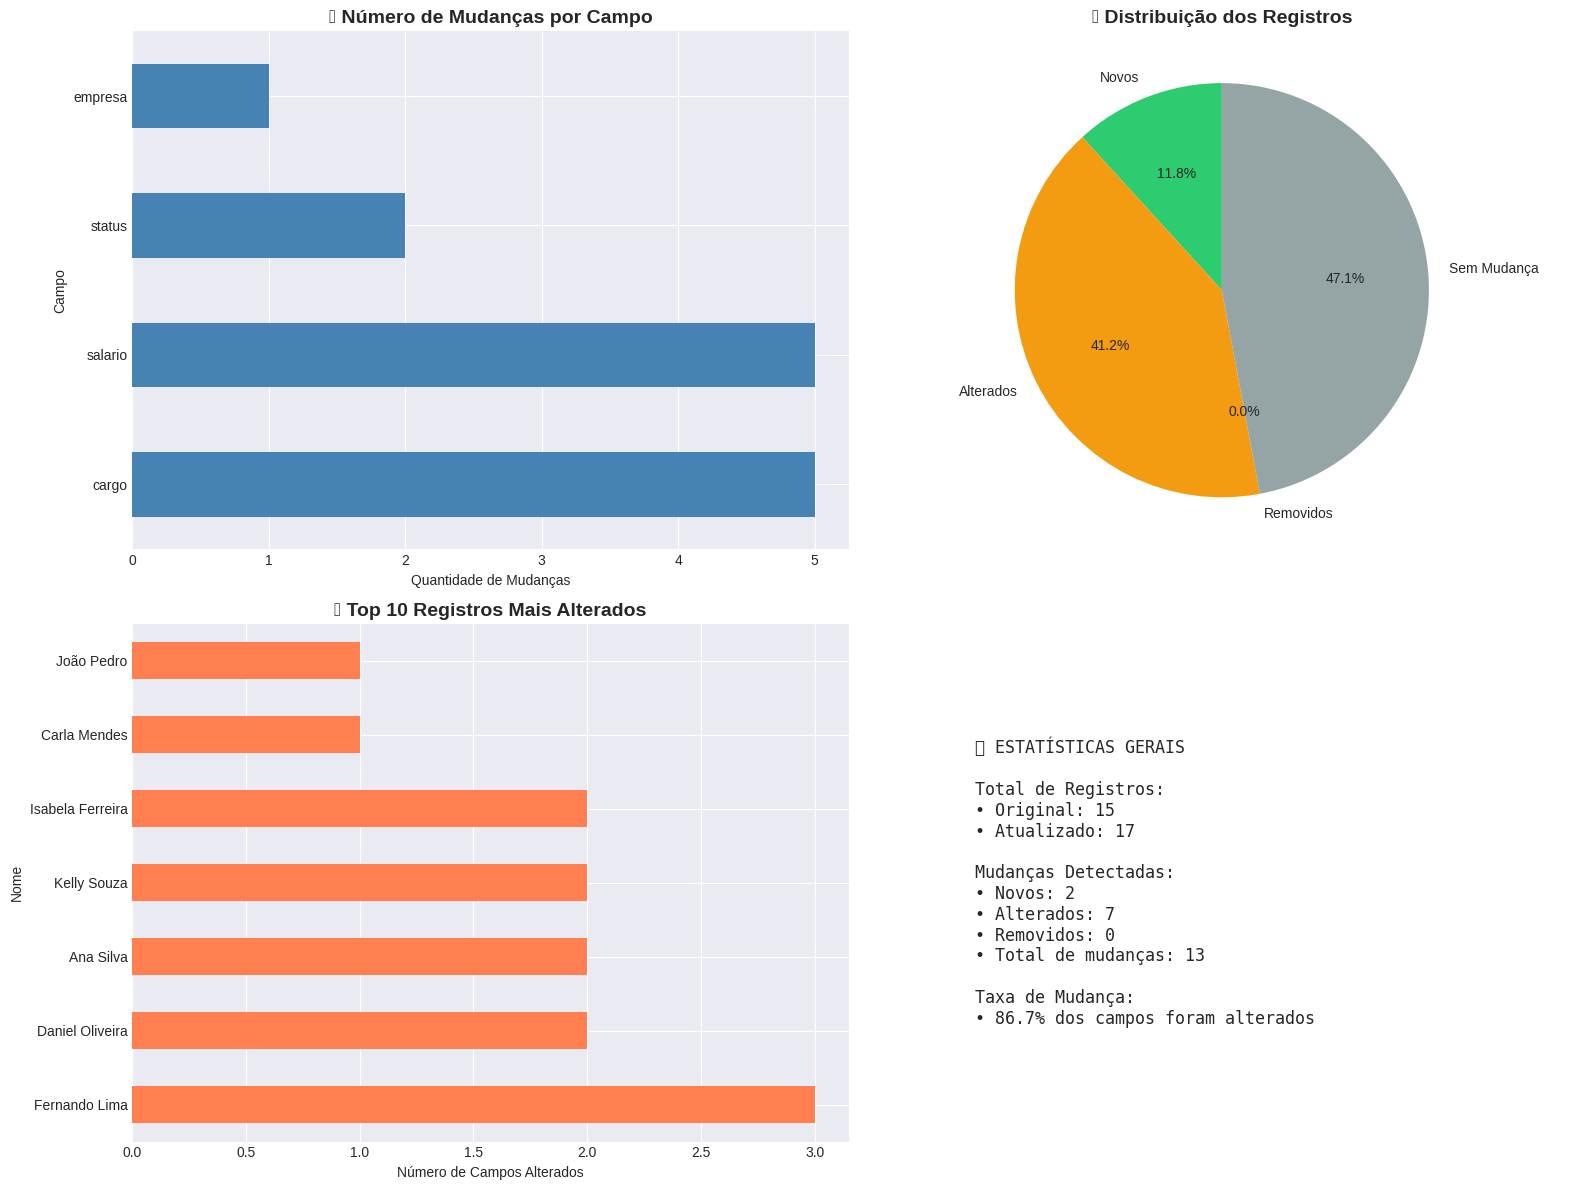

In [9]:
# Resumo das mudanças por campo
if len(df_diferencas) > 0:
    print("\n📈 MUDANÇAS POR CAMPO:")
    print("="*80)
    mudancas_por_campo = df_diferencas['campo'].value_counts()
    print(mudancas_por_campo.to_string())

    # Gráfico de mudanças por campo
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Mudanças por campo
    mudancas_por_campo.plot(kind='barh', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('🔄 Número de Mudanças por Campo', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Quantidade de Mudanças')
    axes[0, 0].set_ylabel('Campo')

    # 2. Resumo geral
    resumo_data = {
        'Novos': len(ids_novos),
        'Alterados': df_diferencas['id'].nunique(),
        'Removidos': len(ids_removidos),
        'Sem Mudança': len(ids_comuns) - df_diferencas['id'].nunique()
    }
    colors = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']
    axes[0, 1].pie(resumo_data.values(), labels=resumo_data.keys(), autopct='%1.1f%%',
                   colors=colors, startangle=90)
    axes[0, 1].set_title('📊 Distribuição dos Registros', fontsize=14, fontweight='bold')

    # 3. Registros mais afetados
    top_alterados = df_diferencas['nome'].value_counts().head(10)
    top_alterados.plot(kind='barh', ax=axes[1, 0], color='coral')
    axes[1, 0].set_title('👤 Top 10 Registros Mais Alterados', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Número de Campos Alterados')
    axes[1, 0].set_ylabel('Nome')

    # 4. Estatísticas gerais
    axes[1, 1].axis('off')
    stats_text = f"""
    📊 ESTATÍSTICAS GERAIS

    Total de Registros:
    • Original: {len(df_original)}
    • Atualizado: {len(df_atualizado)}

    Mudanças Detectadas:
    • Novos: {len(ids_novos)}
    • Alterados: {df_diferencas['id'].nunique()}
    • Removidos: {len(ids_removidos)}
    • Total de mudanças: {len(df_diferencas)}

    Taxa de Mudança:
    • {(len(df_diferencas) / len(df_original) * 100):.1f}% dos campos foram alterados
    """
    axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
                   verticalalignment='center')

    plt.tight_layout()
    plt.savefig('comparacao_tabelas.png', dpi=300, bbox_inches='tight')
    print("\n✅ Gráfico salvo como 'comparacao_tabelas.png'")
    plt.show()

## 📋 6. Relatório Detalhado de Mudanças

In [23]:
from colorama import Fore, Style, init
init(autoreset=True)

# === Configurações ===
LINE = Fore.LIGHTBLACK_EX + "─" * 96 + Style.RESET_ALL
BAR = Fore.LIGHTBLACK_EX + "═" * 100 + Style.RESET_ALL
INDENT = " " * 3

def formatar_relatorio(df_diferencas):
    if len(df_diferencas) == 0:
        print(Fore.GREEN + "✅ Nenhuma diferença encontrada.")
        return

    total_positivo = total_negativo = total_neutro = total_critico = 0

    # ===== Cabeçalho =====
    print("\n" + Fore.CYAN + "🧾" + "═"*98)
    print(Fore.CYAN + Style.BRIGHT + "📊 RELATÓRIO DETALHADO DE MUDANÇAS".center(100))
    print(BAR)
    print(f"{Fore.GREEN}🔺 Aumento/Promoção{Style.RESET_ALL}   "
          f"{Fore.RED}🔻 Redução/Inativo{Style.RESET_ALL}   "
          f"{Fore.YELLOW}⚠️ Neutra{Style.RESET_ALL}   "
          f"{Fore.MAGENTA}🚨 Crítica{Style.RESET_ALL}\n")

    # ===== Corpo =====
    for id_registro in df_diferencas['id'].unique():
        registro = df_diferencas[df_diferencas['id'] == id_registro]
        nome = registro.iloc[0]['nome']

        print(f"{Fore.CYAN}{Style.BRIGHT}ID {id_registro} — {nome}{Style.RESET_ALL}")
        print(INDENT + LINE)

        for _, row in registro.iterrows():
            campo = row['campo']
            antigo = row['valor_antigo']
            novo = row['valor_novo']

            simbolo, cor = "🔹", Fore.YELLOW
            if campo.lower() == "salario":
                antigo_val = float(antigo) if antigo else None
                novo_val = float(novo) if novo else None
                antigo = f"R$ {antigo_val:,.2f}" if antigo_val else "-"
                novo = f"R$ {novo_val:,.2f}" if novo_val else "-"
                if antigo_val and novo_val:
                    if novo_val > antigo_val:
                        simbolo, cor = "🔺", Fore.GREEN
                        total_positivo += 1
                    elif novo_val < antigo_val:
                        simbolo, cor = "🔻", Fore.RED
                        total_negativo += 1
                    else:
                        total_neutro += 1
            else:
                antigo_str, novo_str = str(antigo).lower(), str(novo).lower()
                if any(p in novo_str for p in ["sênior", "lead", "coordenador", "gerente"]):
                    simbolo, cor = "🔺", Fore.GREEN
                    total_positivo += 1
                elif any(p in novo_str for p in ["júnior", "assistente", "estagiário", "inativo"]):
                    simbolo, cor = "🔻", Fore.RED
                    total_negativo += 1
                elif "demit" in novo_str or "excluído" in novo_str:
                    simbolo, cor = "🚨", Fore.MAGENTA
                    total_critico += 1
                else:
                    total_neutro += 1

            print(f"{INDENT}{campo.upper():18s}: "
                  f"{Fore.LIGHTWHITE_EX}{str(antigo):28s}{Style.RESET_ALL} → "
                  f"{Fore.WHITE}{str(novo):28s}{Style.RESET_ALL}  {cor}{simbolo}{Style.RESET_ALL}")

        print()  # espaço entre pessoas

    # ===== Rodapé =====
    print(BAR)
    print(Fore.CYAN + Style.BRIGHT + "✨ Fim do relatório ✨".center(100))
    print(BAR)

    # ===== Resumo Executivo =====
    print(f"\n{Style.BRIGHT}📋 RESUMO EXECUTIVO:{Style.RESET_ALL}")
    print(f"{Fore.GREEN}🔺 Aumentos/Promoções: {total_positivo}{Style.RESET_ALL}")
    print(f"{Fore.RED}🔻 Reduções/Inativos : {total_negativo}{Style.RESET_ALL}")
    print(f"{Fore.YELLOW}⚠️ Neutras           : {total_neutro}{Style.RESET_ALL}")
    print(f"{Fore.MAGENTA}🚨 Críticas          : {total_critico}{Style.RESET_ALL}")
    print(BAR)


# Execução
formatar_relatorio(df_diferencas)



🧾══════════════════════════════════════════════════════════════════════════════════════════════════
                                 📊 RELATÓRIO DETALHADO DE MUDANÇAS                                  
════════════════════════════════════════════════════════════════════════════════════════════════════
🔺 Aumento/Promoção   🔻 Redução/Inativo   ⚠️ Neutra   🚨 Crítica

ID 1 — Ana Silva
   ────────────────────────────────────────────────────────────────────────────────────────────────
   CARGO             : Analista de Dados            → Analista Sênior de Dados      🔺
   SALARIO           : R$ 8,500.00                  → R$ 9,500.00                   🔺

ID 3 — Carla Mendes
   ────────────────────────────────────────────────────────────────────────────────────────────────
   STATUS            : ativo                        → inativo                       🔻

ID 4 — Daniel Oliveira
   ────────────────────────────────────────────────────────────────────────────────────────────────
   CARGO     

## 💾 7. Exportação dos Resultados

In [11]:
# Exportando resultados para CSV
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Exportar novos registros
if len(df_novos) > 0:
    arquivo_novos = f'registros_novos_{timestamp}.csv'
    df_novos.to_csv(arquivo_novos, index=False)
    print(f"✅ Novos registros exportados: {arquivo_novos}")

# Exportar diferenças
if len(df_diferencas) > 0:
    arquivo_diferencas = f'mudancas_detectadas_{timestamp}.csv'
    df_diferencas.to_csv(arquivo_diferencas, index=False)
    print(f"✅ Mudanças exportadas: {arquivo_diferencas}")

# Exportar removidos
if len(df_removidos) > 0:
    arquivo_removidos = f'registros_removidos_{timestamp}.csv'
    df_removidos.to_csv(arquivo_removidos, index=False)
    print(f"✅ Registros removidos exportados: {arquivo_removidos}")

print("\n🎉 Análise concluída com sucesso!")

✅ Novos registros exportados: registros_novos_20251024_225551.csv
✅ Mudanças exportadas: mudancas_detectadas_20251024_225551.csv

🎉 Análise concluída com sucesso!


## 🎯 8. Resumo Final

In [12]:
print("\n" + "="*100)
print("🎯 RESUMO EXECUTIVO DA COMPARAÇÃO")
print("="*100)
print(f"\n📊 Base de Dados:")
print(f"   • Registros na tabela original: {len(df_original)}")
print(f"   • Registros na tabela atualizada: {len(df_atualizado)}")
print(f"\n🔄 Mudanças Identificadas:")
print(f"   • Novos registros (INSERT): {len(ids_novos)}")
print(f"   • Registros alterados (UPDATE): {df_diferencas['id'].nunique() if len(df_diferencas) > 0 else 0}")
print(f"   • Registros removidos (DELETE): {len(ids_removidos)}")
print(f"   • Total de campos alterados: {len(df_diferencas) if len(df_diferencas) > 0 else 0}")
print(f"\n💡 Insights:")
if len(df_diferencas) > 0:
    campo_mais_alterado = df_diferencas['campo'].value_counts().index[0]
    qtd_mais_alterado = df_diferencas['campo'].value_counts().values[0]
    print(f"   • Campo mais alterado: {campo_mais_alterado} ({qtd_mais_alterado} mudanças)")
    print(f"   • Taxa de mudança: {(len(df_diferencas) / (len(df_original) * len(colunas_comparar)) * 100):.2f}%")
else:
    print(f"   • Nenhuma alteração detectada nos registros existentes")
print("\n" + "="*100)
print("\n✨ Análise finalizada! Todos os resultados foram salvos.")


🎯 RESUMO EXECUTIVO DA COMPARAÇÃO

📊 Base de Dados:
   • Registros na tabela original: 15
   • Registros na tabela atualizada: 17

🔄 Mudanças Identificadas:
   • Novos registros (INSERT): 2
   • Registros alterados (UPDATE): 7
   • Registros removidos (DELETE): 0
   • Total de campos alterados: 13

💡 Insights:
   • Campo mais alterado: cargo (5 mudanças)
   • Taxa de mudança: 12.38%


✨ Análise finalizada! Todos os resultados foram salvos.
